In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
data = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.isnull().values.any()

True

In [8]:
data['v2'].nunique()

5169

In [0]:
data.drop_duplicates(subset=['v2'], inplace=True)

In [10]:
len(data)

5169

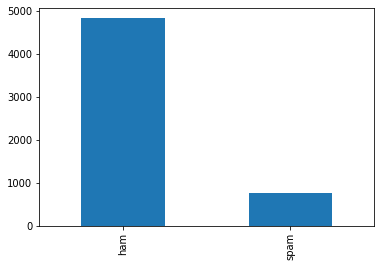

In [6]:
data['v1'].value_counts().plot(kind='bar')

In [14]:
data.groupby('v1').size().reset_index(name='count')

,v1,count
0,0,4516
1,1,653


In [0]:
X_data = data['v2']
y_data = data['v1']

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)

In [18]:
sequences[:5]

[[47,
  433,
  4013,
  780,
  705,
  662,
  64,
  8,
  1202,
  94,
  121,
  434,
  1203,
  142,
  2712,
  1204,
  68,
  57,
  4014,
  137],
 [49, 306, 1364, 435, 6, 1767],
 [53,
  537,
  8,
  20,
  4,
  1016,
  934,
  2,
  220,
  2713,
  1365,
  706,
  2714,
  2715,
  267,
  2716,
  70,
  2713,
  2,
  2717,
  2,
  359,
  537,
  604,
  1205,
  82,
  436,
  185,
  707,
  437,
  4015],
 [6, 226, 152, 23, 347, 2718, 6, 138, 145, 56, 152],
 [935, 1, 97, 96, 69, 453, 2, 877, 69, 1768, 198, 105, 438]]

In [0]:
word_to_index = tokenizer.word_index

In [20]:
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'call': 17,
 'that': 18,
 'on': 19,
 '2': 20,
 'are': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'at': 27,
 'or': 28,
 "i'm": 29,
 'do': 30,
 'be': 31,
 'get': 32,
 'will': 33,
 'just': 34,
 'if': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 'gt': 42,
 'lt': 43,
 '4': 44,
 'how': 45,
 'when': 46,
 'go': 47,
 'from': 48,
 'ok': 49,
 'out': 50,
 'all': 51,
 'what': 52,
 'free': 53,
 'know': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'come': 59,
 'am': 60,
 'was': 61,
 'time': 62,
 'its': 63,
 'only': 64,
 'day': 65,
 'want': 66,
 'love': 67,
 'there': 68,
 'he': 69,
 'text': 70,
 'send': 71,
 'going': 72,
 'one': 73,
 'need': 74,
 'by': 75,
 'lor': 76,
 'home': 77,
 'as': 78,
 'about': 79,
 'still': 80,
 'see': 81,
 'txt': 82,
 'back': 83,
 'r': 84,
 'sto

In [23]:
threshold = 2
total_cnt = len(word_to_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value
    
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold-1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율: ', (rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:', (rare_freq/total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4908
단어 집합에서 희귀 단어의 비율:  55.02242152466368
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.082538108811501


In [39]:
vocab_size = len(word_to_index)+1
vocab_size

8921

In [25]:
n_of_train = int(len(sequences)*0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터 개수 : ', n_of_train)
print('테스트 데이터의 개수 : ', n_of_test)

훈련 데이터 개수 :  4135
테스트 데이터의 개수 :  1034


메일의 최대 길이 : 189
메일의 평균 길이 : 15.610370


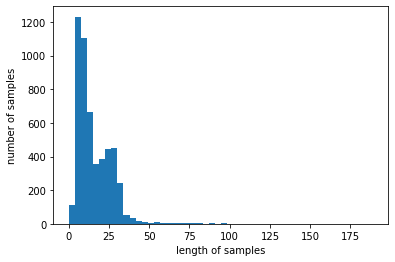

In [31]:
X_data = sequences
print('메일의 최대 길이 : %d' %max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' %(sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [29]:
X_data[:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [32]:
max_len = 189
data = pad_sequences(X_data, maxlen=max_len)
print('훈련 데이터의 크기 : ', data.shape)

훈련 데이터의 크기 :  (5169, 189)


In [0]:
X_test = data[n_of_train:]
y_test = np.array(y_data[n_of_train:])
X_train = data[:n_of_train]
y_train = np.array(y_data[:n_of_train])

In [0]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [45]:
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 2s 41ms/step - loss: 0.3571 - acc: 0.8564 - val_loss: 0.1859 - val_acc: 0.9601
Epoch 2/4
52/52 [==============================] - 2s 39ms/step - loss: 0.1221 - acc: 0.9725 - val_loss: 0.0805 - val_acc: 0.9782
Epoch 3/4
52/52 [==============================] - 2s 40ms/step - loss: 0.1056 - acc: 0.9613 - val_loss: 0.0769 - val_acc: 0.9770
Epoch 4/4
52/52 [==============================] - 2s 39ms/step - loss: 0.0541 - acc: 0.9840 - val_loss: 0.0559 - val_acc: 0.9867


In [46]:
print('테스트 정확도 : %.4f' %(model.evaluate(X_test, y_test)[1]))

33/33 [==============================] - 0s 8ms/step - loss: 0.0622 - acc: 0.9816
테스트 정확도 : 0.9816


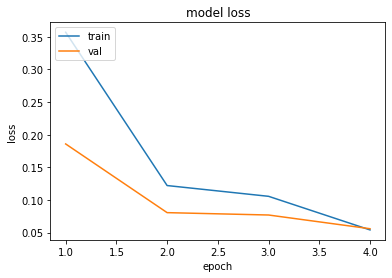

In [47]:
epochs = range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()